In [1]:
import pandas as pd
import numpy as np
import json
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### The cell below load the Safegraph data and parse them

- Now itliteral_eval up for NYC (Bronx, Kings, New York, Queens, Richmond counties)
- The three datasets are for 2020/04, 2019/04 and 2020/10
- The files are exported to *csv.tar.gz in the datasets directory
- DO NOT run the following cell if you do not want to reparse the data
- For futher data explorations just use the *csv.tar.gz in the datasets directory


In [2]:
dir_datasets = "/Users/hkim78/work/Human-Mobility-COVID-19/datasets/"

def parseData(year, month, state, counties, city):
    # For SafeGraph PlaceID to county conversion
    df_CBG = pd.read_csv(dir_datasets + 'placeToCBGMay/placeCountyCBG.csv')
    
    df_1 = pd.read_csv(dir_datasets + 'Places_Patterns/'+year+'/'+month+'/patterns-part1.csv.gz', compression='gzip')
    df_2 = pd.read_csv(dir_datasets + 'Places_Patterns/'+year+'/'+month+'/patterns-part2.csv.gz', compression='gzip')
    df_3 = pd.read_csv(dir_datasets + 'Places_Patterns/'+year+'/'+month+'/patterns-part3.csv.gz', compression='gzip')
    df_4 = pd.read_csv(dir_datasets + 'Places_Patterns/'+year+'/'+month+'/patterns-part4.csv.gz', compression='gzip')
    df_T = pd.concat([df_1, df_2, df_3, df_4])

    df_TC = pd.merge(df_CBG[df_CBG['state']==state], df_T[df_T['region']==state], on='safegraph_place_id')
    df_TC['countyName'] = df_TC['countyName'].apply(lambda x: x[:-7])

    df_F = df_TC[df_TC['countyName'].isin(counties)]
    df_F.drop(columns=['countyFIPS', 'stateFIPS', 'CBGFIPS', 'region', 'safegraph_brand_ids'], inplace=True)
    df_F.reset_index(drop=True, inplace=True)
    df_F.to_csv(dir_datasets + ''+city+'_'+year+'_'+month+'.csv.tar.gz', index=False, compression='gzip')
    
    return df_F

def parseCore(year, month, state, counties, city):
    df_1 = pd.read_csv(dir_datasets + 'Core/'+year+'/'+month+'/core_poi-part1.csv.gz', compression='gzip')
    df_2 = pd.read_csv(dir_datasets + 'Core/'+year+'/'+month+'/core_poi-part2.csv.gz', compression='gzip')
    df_3 = pd.read_csv(dir_datasets + 'Core/'+year+'/'+month+'/core_poi-part3.csv.gz', compression='gzip')
    df_4 = pd.read_csv(dir_datasets + 'Core/'+year+'/'+month+'/core_poi-part4.csv.gz', compression='gzip')
    df_5 = pd.read_csv(dir_datasets + 'Core/'+year+'/'+month+'/core_poi-part5.csv.gz', compression='gzip')
    df_T = pd.concat([df_1, df_2, df_3, df_4, df_5])

    df_TC = pd.merge(df_CBG[df_CBG['state']==state], df_T[df_T['region']==state], on='safegraph_place_id')
    df_TC['countyName'] = df_TC['countyName'].apply(lambda x: x[:-7])

    df_F = df_TC[df_TC['countyName'].isin(counties)]
    df_F.drop(columns=['countyFIPS', 'stateFIPS', 'CBGFIPS', 'phone_number', 'iso_country_code', 'region', 'safegraph_brand_ids'], inplace=True)
    df_F.reset_index(drop=True, inplace=True)
    df_F.to_csv(dir_datasets + 'Core-'+city+'_'+year+'_'+month+'.csv.tar.gz', index=False, compression='gzip')
    return df_F

    
# df_2019_04 = parseData('2019', '04', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_05 = parseData('2019', '05', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_06 = parseData('2019', '06', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_07 = parseData('2019', '07', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_08 = parseData('2019', '08', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_09 = parseData('2019', '09', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_10 = parseData('2019', '10', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_11 = parseData('2019', '11', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2019_12 = parseData('2019', '12', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2020_01 = parseData('2020', '01', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2020_02 = parseData('2020', '02', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2020_03 = parseData('2020', '03', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# df_2020_04 = parseData('2020', '04', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')
# 
# dfC_2020_04 = parseCore('2020', '04', 'NY', ['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], 'NYC')

### Load the data

In [3]:
def slicePlaceType(df_test, df_base, placeType):
    df = df_test[df_test['top_category'].str.contains(placeType, na=False)][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code', 'popularity_by_day']]
    df = pd.merge(df, df_base[df_base['top_category'].str.contains(placeType, na=False)][['safegraph_place_id', 'popularity_by_day']], on='safegraph_place_id')
    df['popularity_by_day_x'] = df['popularity_by_day_x'].apply(lambda x: np.sum(list(literal_eval(x).values())))
    df['popularity_by_day_y'] = df['popularity_by_day_y'].apply(lambda x: np.sum(list(literal_eval(x).values())))
    df['occupancy'] = df['popularity_by_day_x']/df['popularity_by_day_y']*100
    
    return df

In [4]:
df_2019_04 = pd.read_csv(dir_datasets + 'NYC_2019_04.csv.tar.gz', compression='gzip')
df_2019_05 = pd.read_csv(dir_datasets + 'NYC_2019_05.csv.tar.gz', compression='gzip')
df_2019_06 = pd.read_csv(dir_datasets + 'NYC_2019_06.csv.tar.gz', compression='gzip')
df_2019_07 = pd.read_csv(dir_datasets + 'NYC_2019_07.csv.tar.gz', compression='gzip')
df_2019_08 = pd.read_csv(dir_datasets + 'NYC_2019_08.csv.tar.gz', compression='gzip')
df_2019_09 = pd.read_csv(dir_datasets + 'NYC_2019_09.csv.tar.gz', compression='gzip')
df_2019_10 = pd.read_csv(dir_datasets + 'NYC_2019_10.csv.tar.gz', compression='gzip')
df_2019_11 = pd.read_csv(dir_datasets + 'NYC_2019_11.csv.tar.gz', compression='gzip')
df_2019_12 = pd.read_csv(dir_datasets + 'NYC_2019_12.csv.tar.gz', compression='gzip')
df_2020_01 = pd.read_csv(dir_datasets + 'NYC_2020_01.csv.tar.gz', compression='gzip')
df_2020_02 = pd.read_csv(dir_datasets + 'NYC_2020_02.csv.tar.gz', compression='gzip')
df_2020_03 = pd.read_csv(dir_datasets + 'NYC_2020_03.csv.tar.gz', compression='gzip')
df_2020_04 = pd.read_csv(dir_datasets + 'NYC_2020_04.csv.tar.gz', compression='gzip')
dfC_2020_04 = pd.read_csv(dir_datasets + 'Core-NYC_2020_04.csv.tar.gz', compression='gzip')
df_NYC_2019_04 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_04[df_2019_04['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_05 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_05[df_2019_05['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_06 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_06[df_2019_06['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_07 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_07[df_2019_07['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_08 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_08[df_2019_08['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_09 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_09[df_2019_09['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_10 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_10[df_2019_10['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_11 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_11[df_2019_11['city']=='New York'], on='safegraph_place_id')
df_NYC_2019_12 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2019_12[df_2019_12['city']=='New York'], on='safegraph_place_id')
df_NYC_2020_01 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2020_01[df_2020_01['city']=='New York'], on='safegraph_place_id')
df_NYC_2020_02 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2020_02[df_2020_02['city']=='New York'], on='safegraph_place_id')
df_NYC_2020_03 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2020_03[df_2020_03['city']=='New York'], on='safegraph_place_id')
df_NYC_2020_04 = pd.merge(dfC_2020_04[dfC_2020_04['city']=='New York'][['safegraph_place_id', 'top_category', 'sub_category', 'naics_code']], df_2020_04[df_2020_04['city']=='New York'], on='safegraph_place_id')

In [6]:
df_analysis = slicePlaceType(df_NYC_2020_04, df_NYC_2019_04, 'Restaurants')
df_baseline_1 = slicePlaceType(df_NYC_2019_05, df_NYC_2019_04, 'Restaurants')
df_baseline_2 = slicePlaceType(df_NYC_2019_06, df_NYC_2019_04, 'Restaurants')
df_baseline_3 = slicePlaceType(df_NYC_2019_07, df_NYC_2019_04, 'Restaurants')
df_baseline_4 = slicePlaceType(df_NYC_2019_08, df_NYC_2019_04, 'Restaurants')
df_baseline_5 = slicePlaceType(df_NYC_2019_09, df_NYC_2019_04, 'Restaurants')
df_baseline_6 = slicePlaceType(df_NYC_2019_10, df_NYC_2019_04, 'Restaurants')
df_baseline_7 = slicePlaceType(df_NYC_2019_11, df_NYC_2019_04, 'Restaurants')
df_baseline_8 = slicePlaceType(df_NYC_2019_12, df_NYC_2019_04, 'Restaurants')
df_baseline_9 = slicePlaceType(df_NYC_2020_01, df_NYC_2019_04, 'Restaurants')
df_baseline_10 = slicePlaceType(df_NYC_2020_02, df_NYC_2019_04, 'Restaurants')
df_baseline_11 = slicePlaceType(df_NYC_2020_03, df_NYC_2019_04, 'Restaurants')

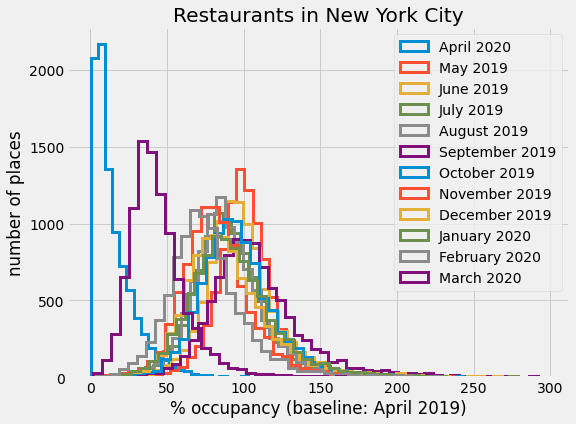

In [7]:
plt.figure(figsize=(8,6))
plt.hist(df_analysis[df_analysis['occupancy'] < 300].occupancy, bins=50, label='April 2020', histtype='step', linewidth=3)
plt.hist(df_baseline_1[df_baseline_1['occupancy'] < 300].occupancy, bins=50, label='May 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_2[df_baseline_2['occupancy'] < 300].occupancy, bins=50, label='June 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_3[df_baseline_3['occupancy'] < 300].occupancy, bins=50, label='July 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_4[df_baseline_4['occupancy'] < 300].occupancy, bins=50, label='August 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_5[df_baseline_5['occupancy'] < 300].occupancy, bins=50, label='September 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_6[df_baseline_6['occupancy'] < 300].occupancy, bins=50, label='October 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_7[df_baseline_7['occupancy'] < 300].occupancy, bins=50, label='November 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_8[df_baseline_8['occupancy'] < 300].occupancy, bins=50, label='December 2019', histtype='step', linewidth=3)
plt.hist(df_baseline_9[df_baseline_9['occupancy'] < 300].occupancy, bins=50, label='January 2020', histtype='step', linewidth=3)
plt.hist(df_baseline_10[df_baseline_10['occupancy'] < 300].occupancy, bins=50, label='February 2020', histtype='step', linewidth=3)
plt.hist(df_baseline_11[df_baseline_11['occupancy'] < 300].occupancy, bins=50, label='March 2020', histtype='step', linewidth=3)
plt.xlabel('% occupancy (baseline: April 2019)')
plt.ylabel('number of places')
plt.title('Restaurants in New York City')
plt.legend()
plt.show()



In [8]:
df = df_analysis[df_analysis['occupancy'] < 300].occupancy

In [9]:
deg_seq = list()
for n in list(df):
    if n - int(n) > 0.5:
        deg_seq.append(int(n)+1)
    else:
        deg_seq.append(int(n))

In [10]:
deg_seq = sorted(deg_seq, reverse=True)

In [11]:
non_zero_deg_seq = [n for n in deg_seq if n > 0]

In [12]:
if np.sum(non_zero_deg_seq)%2 == 0:
    input_deg_seq = non_zero_deg_seq
else:
    input_deg_seq = non_zero_deg_seq[:-1]
    

In [13]:
np.sum(input_deg_seq)

141244

In [14]:
import networkx as nx
hg = nx.havel_hakimi_graph(input_deg_seq)

In [15]:
hg


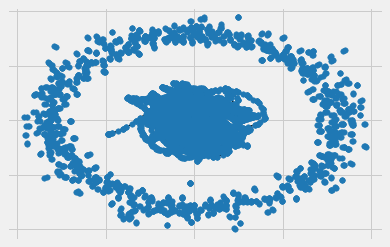

In [18]:
nx.draw_networkx(hg, node_size=30, with_labels=False)

In [20]:
mg = nx.configuration_model(input_deg_seq)

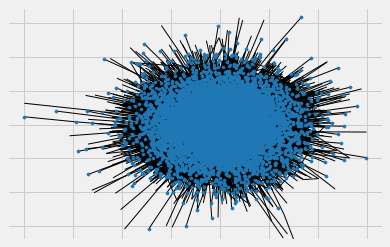

In [25]:
nx.draw_networkx(mg, node_size=10,with_labels=False)
nx.draw_networkx_edges(mg, pos=nx.spring_layout(mg), width=1)

In [33]:
def graphical_deg_seq(occupancy):
    deg_seq = list()
    for n in list(occupancy):
        if n - int(n) > 0.5:
            deg_seq.append(int(n)+1)
        else:
            deg_seq.append(int(n))
            
    st_deg_seq = sorted(deg_seq, reverse=True)  
    non_zero_deg_seq = [n for n in st_deg_seq if n > 0]
    
    non_zero_deg_seq = sorted(non_zero_deg_seq)
    
    s = np.sum(non_zero_deg_seq)
    if s%2 == 0:
        input_deg_seq = non_zero_deg_seq
    else:
        input_deg_seq = non_zero_deg_seq[:-1]
    
    print(np.sum(non_zero_deg_seq))
    
    return input_deg_seq


def TransmissionNet(occupancy, label=None, show=False):   
    import networkx as nx
    input_deg_seq = graphical_deg_seq(occupancy)
    #hg = nx.havel_hakimi_graph(input_deg_seq)
    mg = nx.configuration_model(input_deg_seq)
    nx.draw_networkx(mg, node_size=10,with_labels=False)
    nx.draw_networkx_edges(mg, pos=nx.spring_layout(mg), width=1)
    
    
    
    # #nx.draw_networkx(hg, with_labels=False)
    # mg = nx.configuration_model(input_deg_seq)
    # # iterations = 200; kfactor = 50; seed=1000
    # # pos = nx.fruchterman_reingold_layout(hg, iterations=iterations, k=kfactor, threshold=1e-16, seed=seed)
    # # 
    # # nsize = hg.degree()
    # # nx.draw_networkx_nodes(hg, pos, alpha=1, node_color='#99bde0', node_size= nsize)
    # # #nx.draw_networkx_labels(hg, pos, nodelist = [n[0]], label=n[0], font_size=10)
    # # 
    # # # mg = nx.configuration_model(input_deg_seq)
    # # # nx.draw_networkx(mg, with_labels=False)
    # # 
    # # if show:
    # #     plt.show()
    # #     
    # 

959711


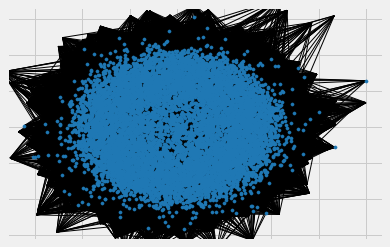

In [34]:
# TransmissionNet(df_analysis[df_analysis['occupancy'] < 300].occupancy)#, label='April 2020')
TransmissionNet(df_baseline_1[df_baseline_1['occupancy'] < 300].occupancy, label='May 2019')
# TransmissionNet(df_baseline_2[df_baseline_2['occupancy'] < 300].occupancy,  label='June 2019')
# TransmissionNet(df_baseline_3[df_baseline_3['occupancy'] < 300].occupancy,  label='July 2019')
# TransmissionNet(df_baseline_4[df_baseline_4['occupancy'] < 300].occupancy,  label='August 2019')
# TransmissionNet(df_baseline_5[df_baseline_5['occupancy'] < 300].occupancy,  label='September 2019')
# TransmissionNet(df_baseline_6[df_baseline_6['occupancy'] < 300].occupancy,  label='October 2019')
# TransmissionNet(df_baseline_7[df_baseline_7['occupancy'] < 300].occupancy,  label='November 2019')
# TransmissionNet(df_baseline_8[df_baseline_8['occupancy'] < 300].occupancy,  label='December 2019')
# TransmissionNet(df_baseline_9[df_baseline_9['occupancy'] < 300].occupancy,  label='January 2020')
# TransmissionNet(df_baseline_10[df_baseline_10['occupancy'] < 300].occupancy,  label='February 2020')
# TransmissionNet(df_baseline_11[df_baseline_11['occupancy'] < 300].occupancy,  label='March 2020')